In [1]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from pylab import rcParams
import networkx as nx
from gensim.models import Word2Vec
import gensim
import numpy as np

In [2]:
df1 = pd.read_csv("scaled_combo_features.csv")

In [3]:
df1

,fk_grade_level_TA,arousal..ANEW._TA,dominance..ANEW._TA,valence..ANEW._TA,concreteness_TA,familiarity_TA,emotionality_TA,extremity_TA,valence..EL._TA,SENT_TA,...,Apology,Truth.Intensifier,Affirmation,Adverb.Limiter,Conjunction.Start,num_ratings,mturk_rating,apology,Brand,Label
0,-0.102348,0.236255,-0.449482,-0.270067,-0.048619,-0.213981,-0.245553,0.208970,-0.152049,1.158130,...,0.313581,-0.208046,-0.157909,-0.284724,-0.390590,3,20.333333,True,Marriot,1
1,1.996280,-2.096391,-1.892456,-1.995635,-0.673987,-0.445584,0.017646,1.125400,1.034104,0.265167,...,-1.022993,-0.208046,-0.157909,-0.284724,-0.390590,3,-14.000000,False,Marriot,0
2,-0.326828,-0.817639,-1.014791,-0.972723,-1.041318,-2.005196,0.161258,0.152088,0.548454,1.254169,...,0.313581,-0.208046,-0.157909,-0.284724,-0.390590,4,27.500000,True,Marriot,1
3,-0.164994,0.448802,0.192798,-0.122658,0.077128,0.058662,-0.119180,0.177369,0.150165,0.530398,...,1.650154,-0.208046,-0.157909,-0.284724,-0.390590,4,30.000000,True,Marriot,1
4,0.283967,-0.356943,-0.514192,-0.570311,-0.585222,0.622655,-2.591543,-2.180069,-2.365444,-1.367783,...,1.650154,-0.208046,-0.157909,-0.284724,-0.390590,4,23.750000,True,Marriot,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0.163896,-0.437463,-0.126961,0.194413,-0.006054,-0.242194,-0.031763,0.929474,0.946136,0.168235,...,-1.022993,-0.208046,-0.157909,-0.284724,-0.390590,6,28.333333,True,Al Bahar,1
776,4.032262,0.180420,0.382369,0.363857,0.626145,0.740951,0.006362,0.174604,-0.069046,-0.811428,...,0.313581,-0.208046,-0.157909,5.799783,4.603844,7,10.857143,True,enVision,1
777,-0.264182,-0.123105,-0.395721,-0.624033,0.615252,-0.842475,0.139269,0.057285,-1.454547,-0.126403,...,0.313581,-0.208046,-0.157909,-0.284724,-0.390590,11,26.272727,True,enVision,1
778,-0.201537,-0.754977,-1.145291,-1.338336,0.284510,0.013399,-2.591543,-2.180069,-2.365444,-0.761686,...,1.650154,-0.208046,-0.157909,-0.284724,-0.390590,4,19.500000,True,enVision,1


In [5]:
## lasso - logistics - label - all features

In [5]:
# df_top_pos = df1[df1["Label"] == 1]
# df_top_neg = df1[df1["Label"] == 0]

In [6]:
# from sklearn.utils import resample
# neg_upsample = resample(df_top_neg,
#              replace=True,
#              n_samples=len(df_top_pos),
#              random_state=42)

# print(neg_upsample.shape)

(519, 182)


In [7]:
# data_upsampled = pd.concat([df_top_pos, neg_upsample])

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

X_data = df1[["Apology"]]
y_data = df1['Label']
X_train, X_test, y_train, y_test = train_test_split(X_data,
                            y_data, stratify=y_data, #keep the same ratio
                            test_size=0.1,
                            random_state=42)

In [5]:
df_train = X_train
df_train["label"] = y_train.to_list()

In [6]:
df_train

,Apology,label
283,0.313581,1
342,0.313581,1
176,0.313581,1
332,-1.022993,0
707,-1.022993,1
...,...,...
48,0.313581,1
153,0.313581,1
109,0.313581,1
430,-1.022993,0


In [7]:
df_top_pos = df_train[df_train["label"] == 1]
df_top_neg = df_train[df_train["label"] == 0]

In [8]:
from sklearn.utils import resample
neg_upsample = resample(df_top_neg,
             replace=True,
             n_samples=len(df_top_pos),
             random_state=42)

print(neg_upsample.shape)

(467, 2)


In [9]:
data_upsampled = pd.concat([df_top_pos, neg_upsample])

In [10]:
X_train1 = data_upsampled[data_upsampled.columns[:-1]]
y_train1 = data_upsampled["label"]

In [21]:
lgclf = LogisticRegression(random_state=42, fit_intercept = True).fit(X_train1, y_train1) 

In [22]:
print(cross_val_score(lgclf, X_train1, y_train1, cv=10))

[0.89361702 0.88297872 0.88297872 0.93617021 0.92473118 0.92473118
 0.90322581 0.88172043 0.87096774 0.89247312]


In [23]:
print("Accuracy Score:",lgclf.score(X_test, y_test))

Accuracy Score: 0.9102564102564102


In [24]:
lgclf.predict(X_test)

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0])

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, lgclf.predict(X_test))

array([[24,  2],
       [ 5, 47]])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


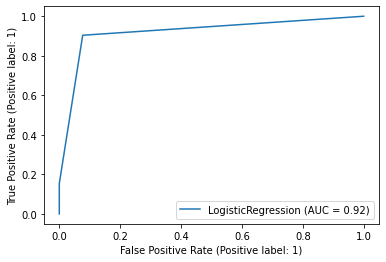

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

rfc_disp = plot_roc_curve(lgclf, X_test, y_test)
plt.show()

In [27]:
coeff_df = pd.DataFrame(X_data.columns)
coeff_df.columns = ['Features']
coeff_df["Coefficient"] = pd.Series(lgclf.coef_[0])
coeff_df["Magnitude"] = pd.Series(abs(lgclf.coef_[0]))
coeff_df.sort_values(by='Magnitude', inplace=True, ascending=True)
df_f0 = coeff_df[coeff_df["Coefficient"] == 0]
df_feature = coeff_df[coeff_df["Coefficient"] != 0]

In [28]:
### what are the textual features that predict apology?

In [29]:
df_feature

,Features,Coefficient,Magnitude
0,Apology,3.01615,3.01615


In [ ]:
## logistics with l2 

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
X_data = df1[["Apology"]]
y_data = df1['mturk_rating']
X_train, X_test, y_train, y_test = train_test_split(X_data,
                            y_data,
                            test_size=0.1,
                            random_state=42)

In [32]:
olsclf = LinearRegression(fit_intercept = True).fit(X_train, y_train)

In [33]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, olsclf.predict(X_test))

253.67957408325134

In [34]:
olsclf.predict(X_test)

array([11.82121483, -7.3251665 , -7.3251665 , -7.3251665 , -7.3251665 ,
       -7.3251665 , 11.82121483, 11.82121483, -7.3251665 , 11.82121483,
       11.82121483, -7.3251665 , 11.82121483, -7.3251665 , 50.11397751,
       11.82121483, 11.82121483, 11.82121483, -7.3251665 , 11.82121483,
       11.82121483, 11.82121483, 30.96759617, 11.82121483, 11.82121483,
       11.82121483, -7.3251665 , 11.82121483, -7.3251665 , 11.82121483,
       11.82121483, -7.3251665 , 30.96759617, 30.96759617, 11.82121483,
       11.82121483, 11.82121483, 11.82121483, -7.3251665 , 11.82121483,
       11.82121483, 11.82121483, 11.82121483, -7.3251665 , 11.82121483,
       -7.3251665 , 11.82121483, -7.3251665 , -7.3251665 , 30.96759617,
       11.82121483, 30.96759617, 30.96759617, 11.82121483, 11.82121483,
       11.82121483, 50.11397751, 30.96759617, 11.82121483, 11.82121483,
       30.96759617, -7.3251665 , -7.3251665 , 11.82121483, 11.82121483,
       11.82121483, -7.3251665 , -7.3251665 , -7.3251665 , 11.82

In [35]:
def match():
    pre_binary = []
    true = []
    no_match = 0
    for i in range(len(y_test)):
        if y_test.to_list()[i] * olsclf.predict(X_test)[i] < 0:
            no_match = no_match + 1
    accuracy = 1- (no_match/len(y_test))
    for i in range(len(y_test)):
        if olsclf.predict(X_test)[i] <= 0:
            pre_binary.append(0)
        else:
            pre_binary.append(1)
    for i in range(len(y_test)):
        if y_test.to_list()[i] <= 0:
            true.append(0)
        else:
            true.append(1)
    print(accuracy)
    return pre_binary, true

In [36]:
pre, true = match()

0.8846153846153846


In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(true, pre)

array([[17,  1],
       [ 9, 51]])

In [38]:
import numpy as np
import scipy.stats
scipy.stats.pearsonr(olsclf.predict(X_test), y_test)

(0.5636127765560426, 7.761082180495237e-08)

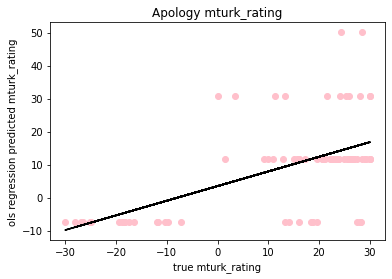

In [39]:
# Visualising the Test set results
theta = np.polyfit(y_test, olsclf.predict(X_test), 1)
y_line = theta[1] + theta[0] * y_test
plt.scatter(y_test, olsclf.predict(X_test), color = 'pink')
plt.plot(y_test, y_line, 'black')
plt.title('Apology mturk_rating')
plt.xlabel('true mturk_rating')
plt.ylabel('ols regression predicted mturk_rating')
plt.show()

In [40]:
coeff_df = pd.DataFrame(X_data.columns)
coeff_df.columns = ['Features']
coeff_df["Coefficient"] = pd.Series(olsclf.coef_)
coeff_df["Magnitude"] = pd.Series(abs(olsclf.coef_))
coeff_df.sort_values(by='Magnitude', inplace=True, ascending=True)
df_f0 = coeff_df[coeff_df["Coefficient"] == 0]
df_feature = coeff_df[coeff_df["Coefficient"] != 0]

In [41]:
df_feature

,Features,Coefficient,Magnitude
0,Apology,14.324972,14.324972
